### **Проект: "Автоматическая классификация отзывов: анализ настроений клиентов маркетплейсов"**

**Цель проекта** — разработка системы для автоматической классификации отзывов на товары, которая определяет полярность отзывов (положительные или отрицательные) на основе их текстового содержания. Модель, обученная на отзывах Amazon, может быть применена для анализа отзывов на других платформах онлайн-торговли, таких как eBay, Walmart и другие, при условии, что структура данных схожа.

### **Business Understanding:**

В современном мире, где онлайн-торговля становится всё более популярной, компании сталкиваются с необходимостью оперативного анализа отзывов клиентов. Автоматическая классификация отзывов на товары может существенно упростить этот процесс, позволив своевременно выявлять негативные отзывы и предпринимать меры по улучшению качества товаров и обслуживания.

**Решение этой задачи имеет множество применений:**

*   Мониторинг отзывов в реальном времени
*   Анализ настроений клиентов
*   Улучшение качества продукции и сервиса

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Understanding:**

Датасет содержит 20 тысяч отзывов на товары с Amazon и соответствующие метки, где 1 обозначает положительный отзыв, а 0 — отрицательный. Это предоставляет  возможность применить методы машинного обучения для решения задачи бинарной классификации текстовых данных.

Датасет состоит из двух колонок:

*   Text: текст отзыва.
*   Label: метка отзыва (1 - положительный, 0 - отрицательный).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon.csv')

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

# Предобработка текста
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

data['processed_text'] = data['Text'].apply(preprocess_text)

print(data['processed_text'].head())

0    This is  the best apps acording to a bunch of ...
1    This is a pretty good version of the game for ...
2    this is a really . there are a bunch of levels...
3    This is a silly game and can be frustrating, b...
4    This is a terrific game on any pad. Hrs of fun...
Name: Text, dtype: object


In [ ]:
# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = data['processed_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Формула TF-IDF:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$
где:
- $\text{TF}(t, d)$ — частота терма $t$ в документе $d$.
- $\text{IDF}(t)$:
$$
\text{IDF}(t) = \log \frac{N}{|\{d \in D : t \in d\}|}
$$


**Векторизация текста была выполнена с помощью TF-IDF**. Этот метод хорошо подходит для выделения важных слов в тексте и уменьшения влияния часто встречающихся слов. Он походит для решения задачи классификации, где важно минимизировать ложные срабатывания

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизация текста
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

### **Baseline:**

Для создания базовой модели была использована логистическая регрессия. Для оценки модели были использованы метрики: Accuracy, Precision, Recall и F1. Логистическая регрессия проста в реализации и интерпретации, что делает её отличным выбором для начального этапа. Также она на позволяет получить начальные метрики для сравнения с более сложными моделями.

### Формула для логистической регрессии:
$$
\hat{y} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
$$
где:
- $\hat{y}$ — предсказанная вероятность положительного класса.
- $\beta_0$ — смещение (intercept).
- $\beta_i$ — коэффициенты модели.
- $x_i$ — признаки.




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Обучение базовой модели
baseline_model = LogisticRegression()
baseline_model.fit(X_train_vec, y_train)

# Предсказание и оценка
y_pred = baseline_model.predict(X_test_vec)

 ### Формулы метрик для оценки модели


      Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

      Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

      Recall
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

      F1 Score
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.878
Precision: 0.8830108827085853
Recall: 0.9665784248841827
F1 Score: 0.9229067930489732


**Оценка результатов**

- Accuracy: модель правильно классифицирует большинство отзывов.
- Precision: модель редко ошибается при классификации положительных отзывов.
- Высокий Recall: модель почти все положительные отзывы классифицирует правильно, но может пропускать некоторые отрицательные отзывы.
- Высокий F1 Score: баланс между Accuracy и Recall очень хороший.

### **Modeling:**

Для улучшения результатов использовалась модель RandomForestClassifier с подбором гиперпараметров GridSearchCV.

**Random Forest Classifier** подходит для задач классификации, благодаря объединению множества деревьев решений, позволяет легко настраивать гиперпараметры, такие как количество деревьев и максимальная глубина, устойчив к шуму в данных.


**GridSearchCV** позволяет произвести исчерпывающий поиск по всем возможным комбинациям заданных гиперпараметров, что гарантирует нахождение наилучших параметров в пределах заданной сетки; использует кросс-валидацию для оценки производительности модели на каждой комбинации гиперпараметров, что обеспечивает надёжность результатов; автоматизирует процесс подбора гиперпараметров, что экономит время и усилия по сравнению с ручным подбором и оценкой.


### RandomForestClassifier
Формула для среднего предсказания:
$$
\hat{y} = \frac{1}{N} \sum_{i=1}^{N} \hat{y}_i
$$


### **Выбор гиперпараметров**

**1. n_estimators (количество деревьев в лесу):**
- Значения: [100, 200]
-  для поиска оптимального баланса между производительностью и временем выполнения

**2. max_depth (максимальная глубина деревьев):**
- Значения: [None, 20]
- значение None позволяет деревьям расти до полной глубины, что может улучшить обучение, но приводит к переобучению. Значение 20 ограничивает глубину деревьев, что помогает предотвратить переобучение

**3. min_samples_split (минимальное количество образцов для разбиения узла):**
- Значения: [2, 5]
- минимальное количество образцов, необходимых для разбиения узла. Значение 2 — стандартное, а значения 5 увеличивают требования для разбиения узла, что может уменьшить переобучение

**4. min_samples_leaf (минимальное количество образцов в листовом узле):**
- Значения: [1, 2]
- минимальное количество образцов, необходимых для создания листового узла. Значение 1 позволяет листовым узлам содержать один образец, в то время как значения 2 могут уменьшить переобучение

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_vec, y_train)

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

Лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Глубина деревьев (max_depth: None) и минимальные значения для min_samples_split и min_samples_leaf указывают на то, что модель будет пытаться максимально точно подстраиваться под обучающие данные. Это может дать высокую точность на тренировочном наборе, но потенциально увеличивает риск переобучения.

Увеличение числа деревьев (n_estimators: 200) помогает улучшить стабильность модели и её способность обобщать, что является положительным моментом.

In [ ]:
# Обучение модели с лучшими гиперпараметрами
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

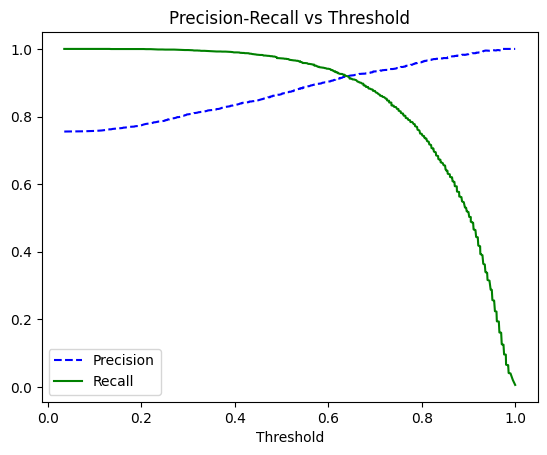

Accuracy: 0.8285
Precision: 0.9434320425208808
Recall: 0.8223031105228326
F1 Score: 0.8787128712871287


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# Получение вероятностей предсказаний для тестового набора
y_probs = best_rf_model.predict_proba(X_test_vec)[:, 1]

# Определение precision, recall и thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Визуализация кривой Precision-Recall
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.title('Precision-Recall vs Threshold')
plt.show()

# Применение threshold
threshold = 0.75
y_pred_threshold = (y_probs >= threshold).astype(int)

print(f'Accuracy: {accuracy_score(y_test, y_pred_threshold)}')
print(f'Precision: {precision_score(y_test, y_pred_threshold)}')
print(f'Recall: {recall_score(y_test, y_pred_threshold)}')
print(f'F1 Score: {f1_score(y_test, y_pred_threshold)}')

In [ ]:
# Пример подачи отзыва
reviews = ["This is a fantastic product!", "I am not satisfied with this purchase."]
reviews_vec = tfidf_vectorizer.transform(reviews)
reviews_pred = best_rf_model.predict(reviews_vec)
print(f"Reviews sentiments: {reviews_pred}")

Reviews sentiments: [1 0]


### **Сравнение моделей**

**Baseline с логистической регрессией:**
1. Дает высокий recall, что означает, что модель правильно идентифицирует большинство положительных отзывов.
2. Высокий F1 Score показывает хорошее равновесие между точностью и полнотой.

- Accuracy: 0.878
- Precision: 0.8830108827085853
- Recall: 0.9665784248841827
- F1 Score: 0.9229067930489732

**RandomForest с GridSearch:**
1. Более высокий Precision, что указывает на меньшую вероятность ложноположительных классификаций. Но сниженный recall может указывать на то, что модель пропускает некоторые положительные отзывы.
2. F1 Score ниже по сравнению с бейзлайном.

- Accuracy: 0.8285
- Precision: 0.9434320425208808
- Recall: 0.8223031105228326
- F1 Score: 0.8787128712871287

### **Расширенная сетка гиперпараметров vs. Оптимизированная сетка гиперпараметров:**

- расширенная сетка

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

- Accuracy: 0.8285
- Precision: 0.9434320425208808
- Recall: 0.8223031105228326
- F1 Score: 0.8787128712871287

- оптимизированная

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

**Причины:**
- Сходные оптимальные параметры
- Устойчивость модели
- Исчерпывающий поиск


### **Выбор оптимального порога (threshold):**

**С порогом 0.7:**
- Accuracy: 0.85875
- Precision: 0.9333333333333333
- Recall: 0.8755790866975512
- F1 Score: 0.9035342325422571

**С порогом 0.8:**
- Accuracy: 0.787
- Precision: 0.9605263157894737
- Recall: 0.7488418266048974
- F1 Score: 0.841576794347341

**С порогом 0.75:**
- Accuracy: 0.8285
- Precision: 0.9434320425208808
- Recall: 0.8223031105228326
- F1 Score: 0.8787128712871287

**Анализ:**

1. Precision: Самый высокий при пороге 0.8, что минимизирует ложноположительные предсказания.
2. Recall: Самый высокий при пороге 0.7, что максимизирует нахождение всех положительных отзывов.
3. F1 Score: Наилучший при пороге 0.7, что показывает лучший баланс междум Precision и Recall.

**Оптимальным выбором будет порог 0.7**, так как он обеспечивает наилучший баланс между обнаружением положительных отзывов и минимизацией ложноположительных.

### **Заключение**

На основании этих результатов можно сделать выводы и принимать решения о дальнейшем улучшении модели и использовании различных методов обработки и анализа данных.

**Например:**
- Балансировка классов
- Ансамблевые методы
- Градиентный бустинг
- Тюнинг гиперпараметров